In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./df_p2.csv')
df.shape

(75, 16)

In [3]:
df.head()

,Test Bench Mark,Test Parameter,L1-D SIZE,L1-I SIZE,L2 SIZE,L1-D Associativity,L1-I Associativity,L2 Associativity,BLOCK SIZE,L1-D MISS RATE,L1-I MISS RATE,L2-MISS RATE,L1-D MISSES,L1-I MISSES,L2-MISSES,#INSTRUCTIONS
0,401.bzip,L2 SIZE,1kB,1kB,1kB,1,1,1,16,0.076852,0.009128,0.717978,538843,117887,471518,10000001
1,401.bzip,L2 SIZE,1kB,1kB,2kB,1,1,1,16,0.076852,0.009128,0.629505,538843,117887,413415,10000001
2,401.bzip,L2 SIZE,1kB,1kB,4kB,1,1,1,16,0.076852,0.009128,0.594427,538843,117887,390378,10000001
3,401.bzip,L2 SIZE,1kB,1kB,8kB,1,1,1,16,0.076852,0.009128,0.579325,538843,117887,380460,10000001
4,401.bzip,L2 SIZE,1kB,1kB,16kB,1,1,1,16,0.076852,0.009128,0.565855,538843,117887,371614,10000001


In [4]:
df.index

RangeIndex(start=0, stop=75, step=1)

In [5]:
df.columns

Index(['Test Bench Mark', 'Test Parameter', 'L1-D SIZE', 'L1-I SIZE',
       'L2 SIZE', 'L1-D Associativity', 'L1-I Associativity',
       'L2 Associativity', 'BLOCK SIZE', 'L1-D MISS RATE', 'L1-I MISS RATE',
       'L2-MISS RATE', 'L1-D MISSES', 'L1-I MISSES', 'L2-MISSES',
       '#INSTRUCTIONS'],
      dtype='object')

In [6]:
df['L1-I SIZE'] = df['L1-I SIZE'].str[:-2].astype(int)
df['L2 SIZE'] = df['L2 SIZE'].str[:-2].astype(int)
df['Test Parameter'] = df['Test Parameter'].replace('L2  Associativity', 'L2 Associativity')
df.head()

,Test Bench Mark,Test Parameter,L1-D SIZE,L1-I SIZE,L2 SIZE,L1-D Associativity,L1-I Associativity,L2 Associativity,BLOCK SIZE,L1-D MISS RATE,L1-I MISS RATE,L2-MISS RATE,L1-D MISSES,L1-I MISSES,L2-MISSES,#INSTRUCTIONS
0,401.bzip,L2 SIZE,1kB,1,1,1,1,1,16,0.076852,0.009128,0.717978,538843,117887,471518,10000001
1,401.bzip,L2 SIZE,1kB,1,2,1,1,1,16,0.076852,0.009128,0.629505,538843,117887,413415,10000001
2,401.bzip,L2 SIZE,1kB,1,4,1,1,1,16,0.076852,0.009128,0.594427,538843,117887,390378,10000001
3,401.bzip,L2 SIZE,1kB,1,8,1,1,1,16,0.076852,0.009128,0.579325,538843,117887,380460,10000001
4,401.bzip,L2 SIZE,1kB,1,16,1,1,1,16,0.076852,0.009128,0.565855,538843,117887,371614,10000001


In [7]:
df['L1-D HIT-RATE'] = 1 - df['L1-D MISS RATE']
df['L1-I HIT-RATE'] = 1 - df['L1-I MISS RATE']
df['L2 HIT-RATE'] = 1 - df['L2-MISS RATE']

In [8]:
df['CPI'] = 1 + ((( (df['L1-I MISSES'] + df['L1-D MISSES']) * 6) + (df['L2-MISSES'] * 50))/ df['#INSTRUCTIONS'])

In [9]:
df

,Test Bench Mark,Test Parameter,L1-D SIZE,L1-I SIZE,L2 SIZE,L1-D Associativity,L1-I Associativity,L2 Associativity,BLOCK SIZE,L1-D MISS RATE,L1-I MISS RATE,L2-MISS RATE,L1-D MISSES,L1-I MISSES,L2-MISSES,#INSTRUCTIONS,L1-D HIT-RATE,L1-I HIT-RATE,L2 HIT-RATE,CPI
0,401.bzip,L2 SIZE,1kB,1,1,1,1,1,16,0.076852,0.009128,0.717978,538843,117887,471518,10000001,0.923148,0.990872,0.282022,3.751628
1,401.bzip,L2 SIZE,1kB,1,2,1,1,1,16,0.076852,0.009128,0.629505,538843,117887,413415,10000001,0.923148,0.990872,0.370495,3.461113
2,401.bzip,L2 SIZE,1kB,1,4,1,1,1,16,0.076852,0.009128,0.594427,538843,117887,390378,10000001,0.923148,0.990872,0.405573,3.345928
3,401.bzip,L2 SIZE,1kB,1,8,1,1,1,16,0.076852,0.009128,0.579325,538843,117887,380460,10000001,0.923148,0.990872,0.420675,3.296338
4,401.bzip,L2 SIZE,1kB,1,16,1,1,1,16,0.076852,0.009128,0.565855,538843,117887,371614,10000001,0.923148,0.990872,0.434145,3.252108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,458.sjeng,BLOCK SIZE,1kB,1,1,1,1,1,32,0.218447,0.000070,0.971022,1693133,956,1644998,10000000,0.781553,0.999930,0.028978,10.241443
71,458.sjeng,BLOCK SIZE,1kB,1,1,1,1,1,64,0.130736,0.000047,0.916804,1013300,644,929588,10000000,0.869264,0.999953,0.083196,6.256306
72,458.sjeng,BLOCK SIZE,1kB,1,1,1,1,1,128,0.097583,0.000035,0.848600,756339,484,642240,10000000,0.902417,0.999965,0.151400,4.665294
73,458.sjeng,BLOCK SIZE,1kB,1,1,1,1,1,256,0.098933,0.000027,0.799070,766809,372,613031,10000000,0.901067,0.999973,0.200930,4.525464


In [10]:
df['#INSTRUCTIONS'].unique()

array([10000001, 10000000])

In [11]:
df.to_csv('./CA_P2_df.csv')

# L1-I SIZE

In [12]:
bench_mark = '401.bzip'
test_param ='L1-I SIZE'
ouputs = ['L1-D HIT-RATE', 'L1-I HIT-RATE','L2 HIT-RATE','CPI']
cols = ['Test Bench Mark',test_param]
[cols.append(c) for c in ouputs]

res = df[(df['Test Bench Mark'] == bench_mark) & (df['Test Parameter'] == test_param)][cols]
res = res.reset_index(drop=True)
res

,Test Bench Mark,L1-I SIZE,L1-D HIT-RATE,L1-I HIT-RATE,L2 HIT-RATE,CPI
0,401.bzip,2,0.923148,0.999569,0.141799,3.662722
1,401.bzip,4,0.923148,0.999687,0.141978,3.654771
2,401.bzip,8,0.923148,0.999704,0.141924,3.653862
3,401.bzip,16,0.923148,0.999863,0.142172,3.643098
4,401.bzip,32,0.923148,0.999880,0.142148,3.642132


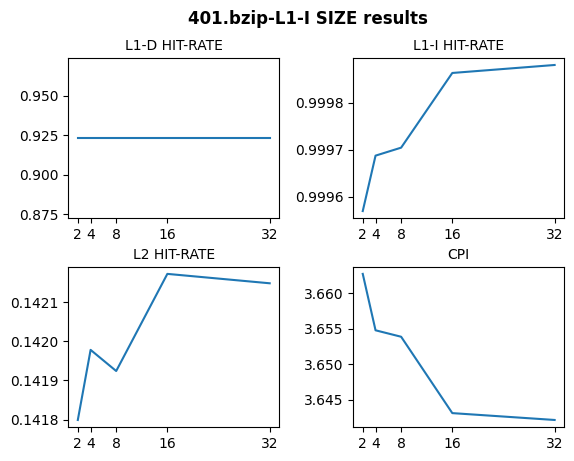

In [13]:
fig, axs = plt.subplots(2, 2)
plt.subplots_adjust(hspace = 0.3, wspace=0.35)

axs[0, 0].plot(res[test_param], res[ouputs[0]])
axs[0, 0].set_title(ouputs[0],fontsize=10)
axs[0, 0].set_xticks(res[test_param])

axs[0, 1].plot(res[test_param], res[ouputs[1]])
axs[0, 1].set_title(ouputs[1],fontsize=10)
axs[0, 1].set_xticks(res[test_param])

axs[1, 0].plot(res[test_param], res[ouputs[2]])
axs[1, 0].set_title(ouputs[2],fontsize=10)
axs[1, 0].set_xticks(res[test_param])

axs[1, 1].plot(res[test_param], res[ouputs[3]])
axs[1, 1].set_title(ouputs[3],fontsize=10)
axs[1, 1].set_xticks(res[test_param])

title = '{}-{} results'.format(bench_mark,test_param)
fig.suptitle(title, fontsize=12, fontweight='bold')
plt.show()

In [14]:
bench_mark = '429.mcf'
test_param ='L1-I SIZE'
ouputs = ['L1-D HIT-RATE', 'L1-I HIT-RATE','L2 HIT-RATE','CPI']
cols = ['Test Bench Mark',test_param]
[cols.append(c) for c in ouputs]

res = df[(df['Test Bench Mark'] == bench_mark) & (df['Test Parameter'] == test_param)][cols]
res = res.reset_index(drop=True)
res

,Test Bench Mark,L1-I SIZE,L1-D HIT-RATE,L1-I HIT-RATE,L2 HIT-RATE,CPI
0,429.mcf,2,0.795895,0.804057,0.215439,16.733786
1,429.mcf,4,0.795895,0.884328,0.278898,10.968484
2,429.mcf,8,0.795895,0.933859,0.323906,7.712629
3,429.mcf,16,0.795895,0.968880,0.390408,5.387728
4,429.mcf,32,0.795895,0.973083,0.441841,4.881616


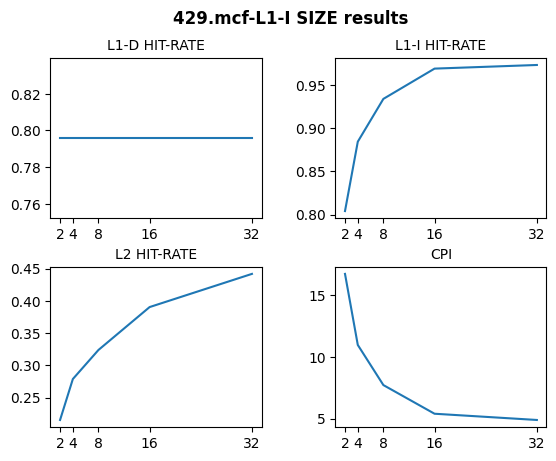

In [15]:
fig, axs = plt.subplots(2, 2)
plt.subplots_adjust(hspace = 0.3, wspace=0.35)

axs[0, 0].plot(res[test_param], res[ouputs[0]])
axs[0, 0].set_title(ouputs[0],fontsize=10)
axs[0, 0].set_xticks(res[test_param])

axs[0, 1].plot(res[test_param], res[ouputs[1]])
axs[0, 1].set_title(ouputs[1],fontsize=10)
axs[0, 1].set_xticks(res[test_param])

axs[1, 0].plot(res[test_param], res[ouputs[2]])
axs[1, 0].set_title(ouputs[2],fontsize=10)
axs[1, 0].set_xticks(res[test_param])

axs[1, 1].plot(res[test_param], res[ouputs[3]])
axs[1, 1].set_title(ouputs[3],fontsize=10)
axs[1, 1].set_xticks(res[test_param])

title = '{}-{} results'.format(bench_mark,test_param)
fig.suptitle(title, fontsize=12, fontweight='bold')
plt.show()

In [16]:
bench_mark = '458.sjeng'
test_param ='L1-I SIZE'
ouputs = ['L1-D HIT-RATE', 'L1-I HIT-RATE','L2 HIT-RATE','CPI']
cols = ['Test Bench Mark',test_param]
[cols.append(c) for c in ouputs]

res = df[(df['Test Bench Mark'] == bench_mark) & (df['Test Parameter'] == test_param)][cols]
res = res.reset_index(drop=True)
res

,Test Bench Mark,L1-I SIZE,L1-D HIT-RATE,L1-I HIT-RATE,L2 HIT-RATE,CPI
0,458.sjeng,2,0.585568,0.999894,0.008647,18.857287
1,458.sjeng,4,0.585568,0.999901,0.008652,18.856703
2,458.sjeng,8,0.585568,0.999905,0.008646,18.856490
3,458.sjeng,16,0.585568,0.999916,0.008617,18.856114
4,458.sjeng,32,0.585568,0.999917,0.008617,18.856057


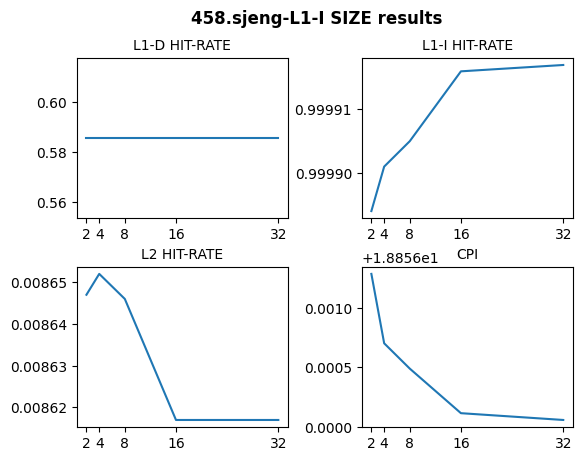

In [17]:
fig, axs = plt.subplots(2, 2)
plt.subplots_adjust(hspace = 0.3, wspace=0.35)

axs[0, 0].plot(res[test_param], res[ouputs[0]])
axs[0, 0].set_title(ouputs[0],fontsize=10)
axs[0, 0].set_xticks(res[test_param])

axs[0, 1].plot(res[test_param], res[ouputs[1]])
axs[0, 1].set_title(ouputs[1],fontsize=10)
axs[0, 1].set_xticks(res[test_param])

axs[1, 0].plot(res[test_param], res[ouputs[2]])
axs[1, 0].set_title(ouputs[2],fontsize=10)
axs[1, 0].set_xticks(res[test_param])

axs[1, 1].plot(res[test_param], res[ouputs[3]])
axs[1, 1].set_title(ouputs[3],fontsize=10)
axs[1, 1].set_xticks(res[test_param])

title = '{}-{} results'.format(bench_mark,test_param)
fig.suptitle(title, fontsize=12, fontweight='bold')
plt.show()

In [18]:
test_param ='L1-I SIZE'
ouputs = ['L1-D HIT-RATE','L1-I HIT-RATE','L2 HIT-RATE','CPI']
cols = ['Test Bench Mark',test_param]
[cols.append(c) for c in ouputs]

res = df[(df['Test Parameter'] == test_param)][cols]
res = res.reset_index(drop=True)
res

,Test Bench Mark,L1-I SIZE,L1-D HIT-RATE,L1-I HIT-RATE,L2 HIT-RATE,CPI
0,401.bzip,2,0.923148,0.999569,0.141799,3.662722
1,401.bzip,4,0.923148,0.999687,0.141978,3.654771
2,401.bzip,8,0.923148,0.999704,0.141924,3.653862
3,401.bzip,16,0.923148,0.999863,0.142172,3.643098
4,401.bzip,32,0.923148,0.999880,0.142148,3.642132
5,429.mcf,2,0.795895,0.804057,0.215439,16.733786
6,429.mcf,4,0.795895,0.884328,0.278898,10.968484
7,429.mcf,8,0.795895,0.933859,0.323906,7.712629
8,429.mcf,16,0.795895,0.968880,0.390408,5.387728
9,429.mcf,32,0.795895,0.973083,0.441841,4.881616


Text(0.5, 0.98, 'Bench Mark Comparsion for L1-I SIZE results')

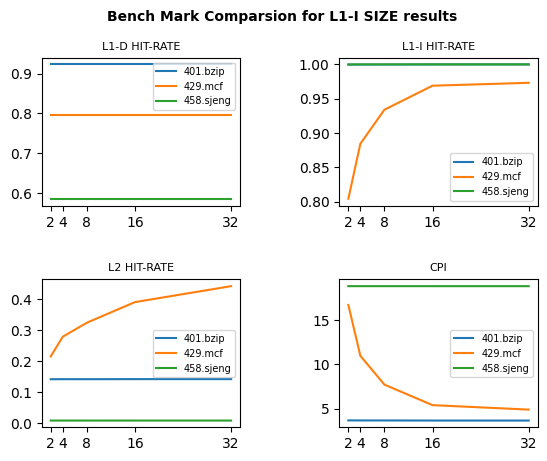

In [19]:
benchmarks = df['Test Bench Mark'].unique()
fig, axs = plt.subplots(2,2)
plt.subplots_adjust(wspace = 0.5,hspace=0.5)
for benchmark in benchmarks:
    data = res[res['Test Bench Mark'] == benchmark]
    k = 0
    for i in range(2):
        for j in range(2):
            axs[i,j].plot(data[test_param], data[ouputs[k]])
            axs[i,j].set_title(ouputs[k],fontsize=8)
            axs[i,j].set_xticks(data[test_param])
            axs[i,j].legend(benchmarks,fontsize='7')
            k += 1
title = 'Bench Mark Comparsion for {} results'.format(test_param)
fig.suptitle(title, fontsize=10, fontweight='bold')

# L1-I Associativity

In [20]:
bench_mark = '401.bzip'
test_param ='L1-I Associativity'
ouputs = ['L1-D HIT-RATE', 'L1-I HIT-RATE','L2 HIT-RATE','CPI']
cols = ['Test Bench Mark',test_param]
[cols.append(c) for c in ouputs]

res = df[(df['Test Bench Mark'] == bench_mark) & (df['Test Parameter'] == test_param)][cols]
res = res.reset_index(drop=True)
res

,Test Bench Mark,L1-I Associativity,L1-D HIT-RATE,L1-I HIT-RATE,L2 HIT-RATE,CPI
0,401.bzip,2,0.923148,0.999294,0.144925,3.671539
1,401.bzip,4,0.923148,0.999441,0.142210,3.669650
2,401.bzip,8,0.923148,0.999437,0.142295,3.669688
3,401.bzip,16,0.923148,0.999455,0.141865,3.669712
4,401.bzip,32,0.923148,0.999442,0.142135,3.669797


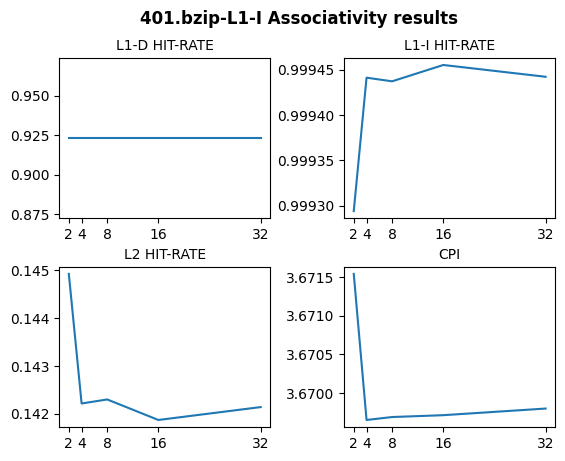

In [21]:
fig, axs = plt.subplots(2, 2)
plt.subplots_adjust(hspace = 0.3, wspace=0.35)

axs[0, 0].plot(res[test_param], res[ouputs[0]])
axs[0, 0].set_title(ouputs[0],fontsize=10)
axs[0, 0].set_xticks(res[test_param])

axs[0, 1].plot(res[test_param], res[ouputs[1]])
axs[0, 1].set_title(ouputs[1],fontsize=10)
axs[0, 1].set_xticks(res[test_param])

axs[1, 0].plot(res[test_param], res[ouputs[2]])
axs[1, 0].set_title(ouputs[2],fontsize=10)
axs[1, 0].set_xticks(res[test_param])

axs[1, 1].plot(res[test_param], res[ouputs[3]])
axs[1, 1].set_title(ouputs[3],fontsize=10)
axs[1, 1].set_xticks(res[test_param])

title = '{}-{} results'.format(bench_mark,test_param)
fig.suptitle(title, fontsize=12, fontweight='bold')
plt.show()

In [22]:
bench_mark = '429.mcf'
test_param ='L1-I Associativity'
ouputs = ['L1-D HIT-RATE', 'L1-I HIT-RATE','L2 HIT-RATE','CPI']
cols = ['Test Bench Mark',test_param]
[cols.append(c) for c in ouputs]

res = df[(df['Test Bench Mark'] == bench_mark) & (df['Test Parameter'] == test_param)][cols]
res = res.reset_index(drop=True)
res

,Test Bench Mark,L1-I Associativity,L1-D HIT-RATE,L1-I HIT-RATE,L2 HIT-RATE,CPI
0,429.mcf,2,0.795895,0.805386,0.137228,18.004016
1,429.mcf,4,0.795895,0.803242,0.099019,18.816263
2,429.mcf,8,0.795895,0.804178,0.075722,19.155318
3,429.mcf,16,0.795895,0.804550,0.066443,19.289519
4,429.mcf,32,0.795895,0.804551,0.062422,19.359263


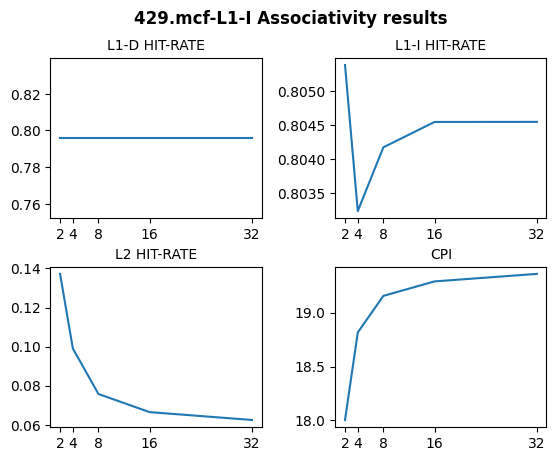

In [23]:
fig, axs = plt.subplots(2, 2)
plt.subplots_adjust(hspace = 0.3, wspace=0.35)

axs[0, 0].plot(res[test_param], res[ouputs[0]])
axs[0, 0].set_title(ouputs[0],fontsize=10)
axs[0, 0].set_xticks(res[test_param])

axs[0, 1].plot(res[test_param], res[ouputs[1]])
axs[0, 1].set_title(ouputs[1],fontsize=10)
axs[0, 1].set_xticks(res[test_param])

axs[1, 0].plot(res[test_param], res[ouputs[2]])
axs[1, 0].set_title(ouputs[2],fontsize=10)
axs[1, 0].set_xticks(res[test_param])

axs[1, 1].plot(res[test_param], res[ouputs[3]])
axs[1, 1].set_title(ouputs[3],fontsize=10)
axs[1, 1].set_xticks(res[test_param])

title = '{}-{} results'.format(bench_mark,test_param)
fig.suptitle(title, fontsize=12, fontweight='bold')
plt.show()

In [24]:
bench_mark = '458.sjeng'
test_param ='L1-I Associativity'
ouputs = ['L1-D HIT-RATE', 'L1-I HIT-RATE','L2 HIT-RATE','CPI']
cols = ['Test Bench Mark',test_param]
[cols.append(c) for c in ouputs]

res = df[(df['Test Bench Mark'] == bench_mark) & (df['Test Parameter'] == test_param)][cols]
res = res.reset_index(drop=True)
res

,Test Bench Mark,L1-I Associativity,L1-D HIT-RATE,L1-I HIT-RATE,L2 HIT-RATE,CPI
0,458.sjeng,2,0.585568,0.999888,0.008641,18.857887
1,458.sjeng,4,0.585568,0.999893,0.008637,18.857581
2,458.sjeng,8,0.585568,0.999888,0.008663,18.857520
3,458.sjeng,16,0.585568,0.999887,0.008667,18.857505
4,458.sjeng,32,0.585568,0.999887,0.008665,18.857535


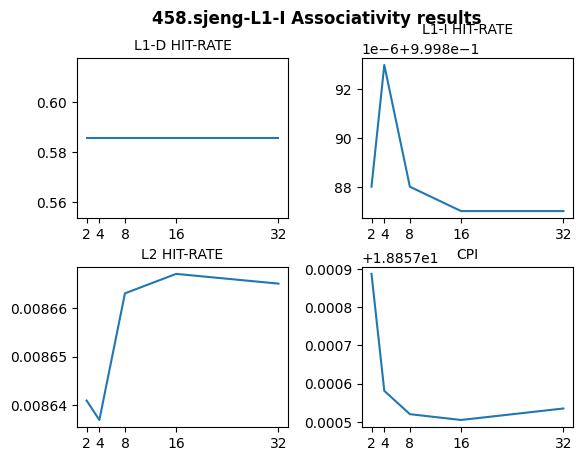

In [25]:
fig, axs = plt.subplots(2, 2)
plt.subplots_adjust(hspace = 0.3, wspace=0.35)

axs[0, 0].plot(res[test_param], res[ouputs[0]])
axs[0, 0].set_title(ouputs[0],fontsize=10)
axs[0, 0].set_xticks(res[test_param])

axs[0, 1].plot(res[test_param], res[ouputs[1]])
axs[0, 1].set_title(ouputs[1],fontsize=10)
axs[0, 1].set_xticks(res[test_param])

axs[1, 0].plot(res[test_param], res[ouputs[2]])
axs[1, 0].set_title(ouputs[2],fontsize=10)
axs[1, 0].set_xticks(res[test_param])

axs[1, 1].plot(res[test_param], res[ouputs[3]])
axs[1, 1].set_title(ouputs[3],fontsize=10)
axs[1, 1].set_xticks(res[test_param])

title = '{}-{} results'.format(bench_mark,test_param)
fig.suptitle(title, fontsize=12, fontweight='bold')
plt.show()

In [26]:
test_param ='L1-I Associativity'
ouputs = ['L1-D HIT-RATE','L1-I HIT-RATE','L2 HIT-RATE','CPI']
cols = ['Test Bench Mark',test_param]
[cols.append(c) for c in ouputs]

res = df[(df['Test Parameter'] == test_param)][cols]
res = res.reset_index(drop=True)
res

,Test Bench Mark,L1-I Associativity,L1-D HIT-RATE,L1-I HIT-RATE,L2 HIT-RATE,CPI
0,401.bzip,2,0.923148,0.999294,0.144925,3.671539
1,401.bzip,4,0.923148,0.999441,0.142210,3.669650
2,401.bzip,8,0.923148,0.999437,0.142295,3.669688
3,401.bzip,16,0.923148,0.999455,0.141865,3.669712
4,401.bzip,32,0.923148,0.999442,0.142135,3.669797
5,429.mcf,2,0.795895,0.805386,0.137228,18.004016
6,429.mcf,4,0.795895,0.803242,0.099019,18.816263
7,429.mcf,8,0.795895,0.804178,0.075722,19.155318
8,429.mcf,16,0.795895,0.804550,0.066443,19.289519
9,429.mcf,32,0.795895,0.804551,0.062422,19.359263


Text(0.5, 0.98, 'Bench Mark Comparsion for L1-I Associativity results')

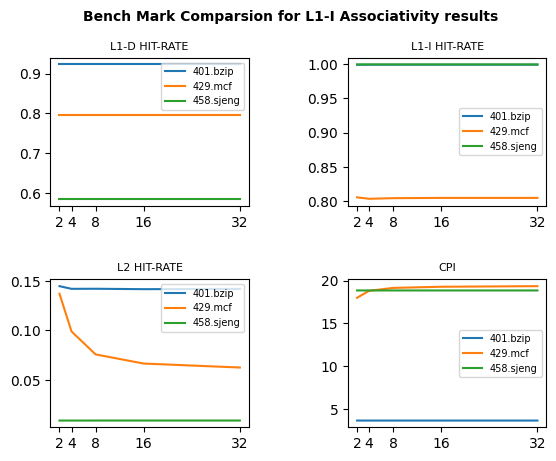

In [27]:
benchmarks = df['Test Bench Mark'].unique()
fig, axs = plt.subplots(2,2)
plt.subplots_adjust(wspace = 0.5,hspace=0.5)
for benchmark in benchmarks:
    data = res[res['Test Bench Mark'] == benchmark]
    k = 0
    for i in range(2):
        for j in range(2):
            axs[i,j].plot(data[test_param], data[ouputs[k]])
            axs[i,j].set_title(ouputs[k],fontsize=8)
            axs[i,j].set_xticks(data[test_param])
            axs[i,j].legend(benchmarks,fontsize='7')
            k += 1
title = 'Bench Mark Comparsion for {} results'.format(test_param)
fig.suptitle(title, fontsize=10, fontweight='bold')

# L2 SIZE

In [28]:
bench_mark = '401.bzip'
test_param ='L2 SIZE'
ouputs = ['L1-D HIT-RATE', 'L1-I HIT-RATE','L2 HIT-RATE','CPI']
cols = ['Test Bench Mark',test_param]
[cols.append(c) for c in ouputs]

res = df[(df['Test Bench Mark'] == bench_mark) & (df['Test Parameter'] == test_param)][cols]
res = res.reset_index(drop=True)
res

,Test Bench Mark,L2 SIZE,L1-D HIT-RATE,L1-I HIT-RATE,L2 HIT-RATE,CPI
0,401.bzip,1,0.923148,0.990872,0.282022,3.751628
1,401.bzip,2,0.923148,0.990872,0.370495,3.461113
2,401.bzip,4,0.923148,0.990872,0.405573,3.345928
3,401.bzip,8,0.923148,0.990872,0.420675,3.296338
4,401.bzip,16,0.923148,0.990872,0.434145,3.252108


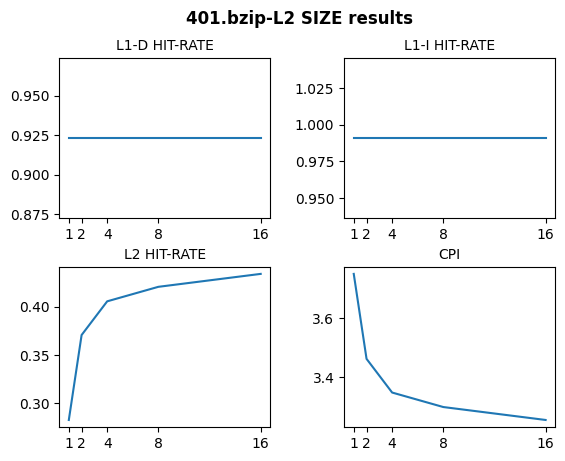

In [29]:
fig, axs = plt.subplots(2, 2)
plt.subplots_adjust(hspace = 0.3, wspace=0.35)

axs[0, 0].plot(res[test_param], res[ouputs[0]])
axs[0, 0].set_title(ouputs[0],fontsize=10)
axs[0, 0].set_xticks(res[test_param])

axs[0, 1].plot(res[test_param], res[ouputs[1]])
axs[0, 1].set_title(ouputs[1],fontsize=10)
axs[0, 1].set_xticks(res[test_param])

axs[1, 0].plot(res[test_param], res[ouputs[2]])
axs[1, 0].set_title(ouputs[2],fontsize=10)
axs[1, 0].set_xticks(res[test_param])

axs[1, 1].plot(res[test_param], res[ouputs[3]])
axs[1, 1].set_title(ouputs[3],fontsize=10)
axs[1, 1].set_xticks(res[test_param])

title = '{}-{} results'.format(bench_mark,test_param)
fig.suptitle(title, fontsize=12, fontweight='bold')
plt.show()

In [30]:
bench_mark = '429.mcf'
test_param ='L2 SIZE'
ouputs = ['L1-D HIT-RATE', 'L1-I HIT-RATE','L2 HIT-RATE','CPI']
cols = ['Test Bench Mark',test_param]
[cols.append(c) for c in ouputs]

res = df[(df['Test Bench Mark'] == bench_mark) & (df['Test Parameter'] == test_param)][cols]
res = res.reset_index(drop=True)
res

,Test Bench Mark,L2 SIZE,L1-D HIT-RATE,L1-I HIT-RATE,L2 HIT-RATE,CPI
0,429.mcf,1,0.795895,0.789698,0.185042,18.189424
1,429.mcf,2,0.795895,0.789698,0.223695,17.478784
2,429.mcf,4,0.795895,0.789698,0.410752,14.039689
3,429.mcf,8,0.795895,0.789698,0.655854,9.533439
4,429.mcf,16,0.795895,0.789698,0.818610,6.541124


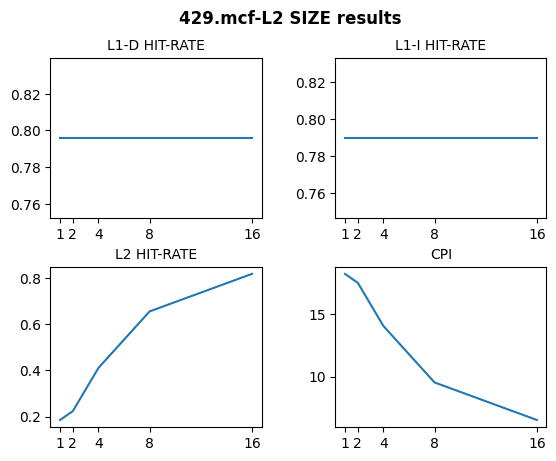

In [31]:
fig, axs = plt.subplots(2, 2)
plt.subplots_adjust(hspace = 0.3, wspace=0.35)

axs[0, 0].plot(res[test_param], res[ouputs[0]])
axs[0, 0].set_title(ouputs[0],fontsize=10)
axs[0, 0].set_xticks(res[test_param])

axs[0, 1].plot(res[test_param], res[ouputs[1]])
axs[0, 1].set_title(ouputs[1],fontsize=10)
axs[0, 1].set_xticks(res[test_param])

axs[1, 0].plot(res[test_param], res[ouputs[2]])
axs[1, 0].set_title(ouputs[2],fontsize=10)
axs[1, 0].set_xticks(res[test_param])

axs[1, 1].plot(res[test_param], res[ouputs[3]])
axs[1, 1].set_title(ouputs[3],fontsize=10)
axs[1, 1].set_xticks(res[test_param])

title = '{}-{} results'.format(bench_mark,test_param)
fig.suptitle(title, fontsize=12, fontweight='bold')
plt.show()

In [32]:
bench_mark = '458.sjeng'
test_param ='L2 SIZE'
ouputs = ['L1-D HIT-RATE', 'L1-I HIT-RATE','L2 HIT-RATE','CPI']
cols = ['Test Bench Mark',test_param]
[cols.append(c) for c in ouputs]

res = df[(df['Test Bench Mark'] == bench_mark) & (df['Test Parameter'] == test_param)][cols]
res = res.reset_index(drop=True)
res

,Test Bench Mark,L2 SIZE,L1-D HIT-RATE,L1-I HIT-RATE,L2 HIT-RATE,CPI
0,458.sjeng,1,0.585568,0.999885,0.008657,18.857799
1,458.sjeng,2,0.585568,0.999885,0.012377,18.798014
2,458.sjeng,4,0.585568,0.999885,0.018923,18.692824
3,458.sjeng,8,0.585568,0.999885,0.021802,18.646574
4,458.sjeng,16,0.585568,0.999885,0.022640,18.633109


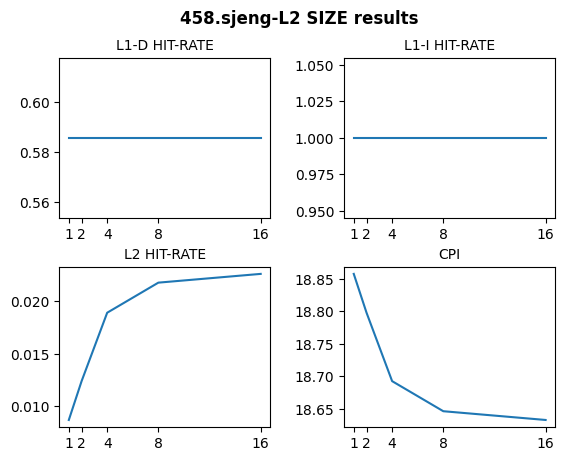

In [33]:
fig, axs = plt.subplots(2, 2)
plt.subplots_adjust(hspace = 0.3, wspace=0.35)

axs[0, 0].plot(res[test_param], res[ouputs[0]])
axs[0, 0].set_title(ouputs[0],fontsize=10)
axs[0, 0].set_xticks(res[test_param])

axs[0, 1].plot(res[test_param], res[ouputs[1]])
axs[0, 1].set_title(ouputs[1],fontsize=10)
axs[0, 1].set_xticks(res[test_param])

axs[1, 0].plot(res[test_param], res[ouputs[2]])
axs[1, 0].set_title(ouputs[2],fontsize=10)
axs[1, 0].set_xticks(res[test_param])

axs[1, 1].plot(res[test_param], res[ouputs[3]])
axs[1, 1].set_title(ouputs[3],fontsize=10)
axs[1, 1].set_xticks(res[test_param])

title = '{}-{} results'.format(bench_mark,test_param)
fig.suptitle(title, fontsize=12, fontweight='bold')
plt.show()

In [34]:
test_param ='L2 SIZE'
ouputs = ['L1-D HIT-RATE','L1-I HIT-RATE','L2 HIT-RATE','CPI']
cols = ['Test Bench Mark',test_param]
[cols.append(c) for c in ouputs]

res = df[(df['Test Parameter'] == test_param)][cols]
res = res.reset_index(drop=True)
res

,Test Bench Mark,L2 SIZE,L1-D HIT-RATE,L1-I HIT-RATE,L2 HIT-RATE,CPI
0,401.bzip,1,0.923148,0.990872,0.282022,3.751628
1,401.bzip,2,0.923148,0.990872,0.370495,3.461113
2,401.bzip,4,0.923148,0.990872,0.405573,3.345928
3,401.bzip,8,0.923148,0.990872,0.420675,3.296338
4,401.bzip,16,0.923148,0.990872,0.434145,3.252108
5,429.mcf,1,0.795895,0.789698,0.185042,18.189424
6,429.mcf,2,0.795895,0.789698,0.223695,17.478784
7,429.mcf,4,0.795895,0.789698,0.410752,14.039689
8,429.mcf,8,0.795895,0.789698,0.655854,9.533439
9,429.mcf,16,0.795895,0.789698,0.818610,6.541124


Text(0.5, 0.98, 'Bench Mark Comparsion for L2 SIZE results')

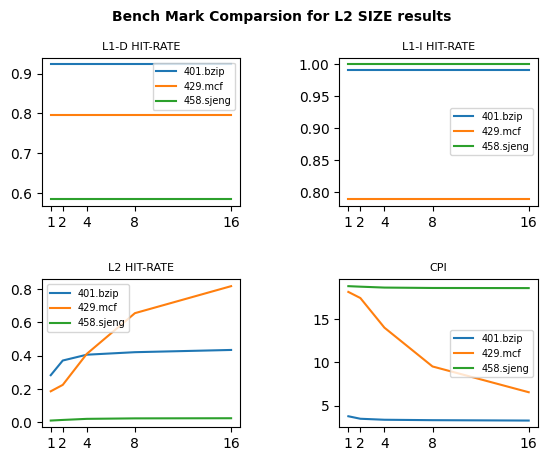

In [35]:
benchmarks = df['Test Bench Mark'].unique()
fig, axs = plt.subplots(2,2)
plt.subplots_adjust(wspace = 0.5,hspace=0.5)
for benchmark in benchmarks:
    data = res[res['Test Bench Mark'] == benchmark]
    k = 0
    for i in range(2):
        for j in range(2):
            axs[i,j].plot(data[test_param], data[ouputs[k]])
            axs[i,j].set_title(ouputs[k],fontsize=8)
            axs[i,j].set_xticks(data[test_param])
            axs[i,j].legend(benchmarks,fontsize='7')
            k += 1
title = 'Bench Mark Comparsion for {} results'.format(test_param)
fig.suptitle(title, fontsize=10, fontweight='bold')

# L2 Associativity

In [36]:
bench_mark = '401.bzip'
test_param ='L2 Associativity'
ouputs = ['L1-D HIT-RATE', 'L1-I HIT-RATE','L2 HIT-RATE','CPI']
cols = ['Test Bench Mark',test_param]
[cols.append(c) for c in ouputs]

res = df[(df['Test Bench Mark'] == bench_mark) & (df['Test Parameter'] == test_param)][cols]
res = res.reset_index(drop=True)
res

,Test Bench Mark,L2 Associativity,L1-D HIT-RATE,L1-I HIT-RATE,L2 HIT-RATE,CPI
0,401.bzip,2,0.923148,0.990872,0.335694,3.575388
1,401.bzip,4,0.923148,0.990872,0.348833,3.532243
2,401.bzip,8,0.923148,0.990872,0.352732,3.519438
3,401.bzip,16,0.923148,0.990872,0.354133,3.514838
4,401.bzip,32,0.923148,0.990872,0.354689,3.513013


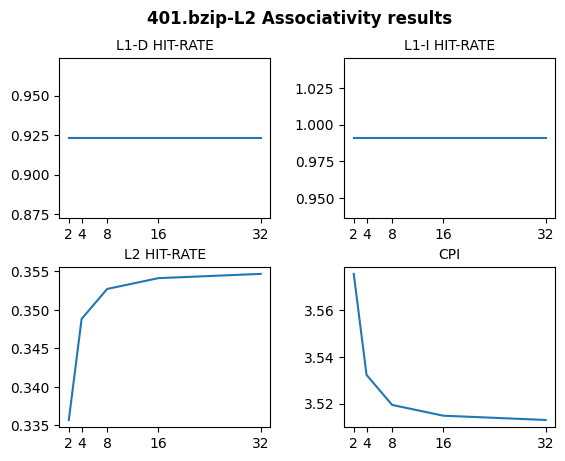

In [37]:
fig, axs = plt.subplots(2, 2)
plt.subplots_adjust(hspace = 0.3, wspace=0.35)

axs[0, 0].plot(res[test_param], res[ouputs[0]])
axs[0, 0].set_title(ouputs[0],fontsize=10)
axs[0, 0].set_xticks(res[test_param])

axs[0, 1].plot(res[test_param], res[ouputs[1]])
axs[0, 1].set_title(ouputs[1],fontsize=10)
axs[0, 1].set_xticks(res[test_param])

axs[1, 0].plot(res[test_param], res[ouputs[2]])
axs[1, 0].set_title(ouputs[2],fontsize=10)
axs[1, 0].set_xticks(res[test_param])

axs[1, 1].plot(res[test_param], res[ouputs[3]])
axs[1, 1].set_title(ouputs[3],fontsize=10)
axs[1, 1].set_xticks(res[test_param])

title = '{}-{} results'.format(bench_mark,test_param)
fig.suptitle(title, fontsize=12, fontweight='bold')
plt.show()

In [38]:
bench_mark = '429.mcf'
test_param ='L2 Associativity'
ouputs = ['L1-D HIT-RATE', 'L1-I HIT-RATE','L2 HIT-RATE','CPI']
cols = ['Test Bench Mark',test_param]
[cols.append(c) for c in ouputs]

res = df[(df['Test Bench Mark'] == bench_mark) & (df['Test Parameter'] == test_param)][cols]
res = res.reset_index(drop=True)
res

,Test Bench Mark,L2 Associativity,L1-D HIT-RATE,L1-I HIT-RATE,L2 HIT-RATE,CPI
0,429.mcf,2,0.795895,0.789698,0.135381,19.102449
1,429.mcf,4,0.795895,0.789698,0.134086,19.126274
2,429.mcf,8,0.795895,0.789698,0.135459,19.101014
3,429.mcf,16,0.795895,0.789698,0.136976,19.073134
4,429.mcf,32,0.795895,0.789698,0.134894,19.111419


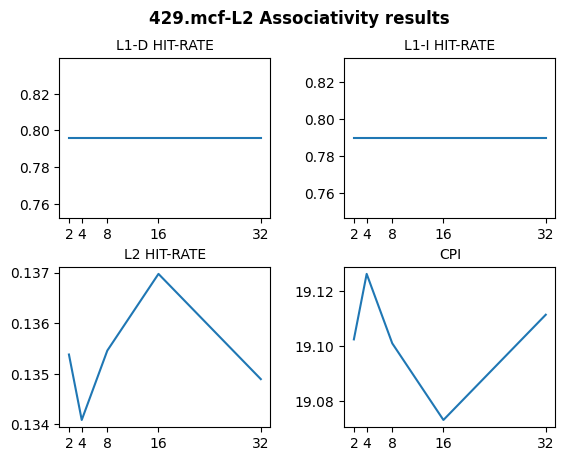

In [39]:
fig, axs = plt.subplots(2, 2)
plt.subplots_adjust(hspace = 0.3, wspace=0.35)

axs[0, 0].plot(res[test_param], res[ouputs[0]])
axs[0, 0].set_title(ouputs[0],fontsize=10)
axs[0, 0].set_xticks(res[test_param])

axs[0, 1].plot(res[test_param], res[ouputs[1]])
axs[0, 1].set_title(ouputs[1],fontsize=10)
axs[0, 1].set_xticks(res[test_param])

axs[1, 0].plot(res[test_param], res[ouputs[2]])
axs[1, 0].set_title(ouputs[2],fontsize=10)
axs[1, 0].set_xticks(res[test_param])

axs[1, 1].plot(res[test_param], res[ouputs[3]])
axs[1, 1].set_title(ouputs[3],fontsize=10)
axs[1, 1].set_xticks(res[test_param])

title = '{}-{} results'.format(bench_mark,test_param)
fig.suptitle(title, fontsize=12, fontweight='bold')
plt.show()

In [40]:
bench_mark = '458.sjeng'
test_param ='L2 Associativity'
ouputs = ['L1-D HIT-RATE', 'L1-I HIT-RATE','L2 HIT-RATE','CPI']
cols = ['Test Bench Mark',test_param]
[cols.append(c) for c in ouputs]

res = df[(df['Test Bench Mark'] == bench_mark) & (df['Test Parameter'] == test_param)][cols]
res = res.reset_index(drop=True)
res

,Test Bench Mark,L2 Associativity,L1-D HIT-RATE,L1-I HIT-RATE,L2 HIT-RATE,CPI
0,458.sjeng,2,0.585568,0.999885,0.018507,18.699524
1,458.sjeng,4,0.585568,0.999885,0.019108,18.689854
2,458.sjeng,8,0.585568,0.999885,0.019395,18.685244
3,458.sjeng,16,0.585568,0.999885,0.019385,18.685409
4,458.sjeng,32,0.585568,0.999885,0.019406,18.685069


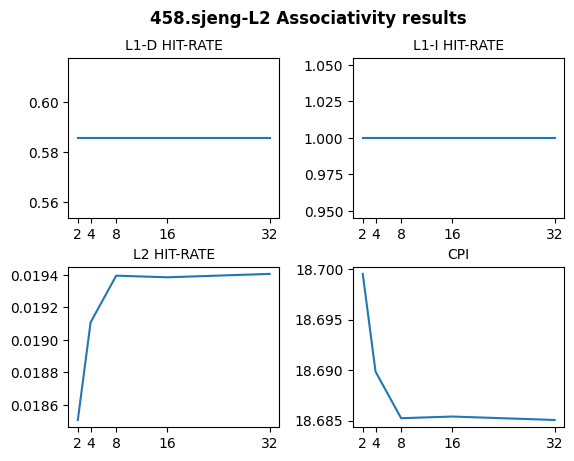

In [41]:
fig, axs = plt.subplots(2, 2)
plt.subplots_adjust(hspace = 0.3, wspace=0.35)

axs[0, 0].plot(res[test_param], res[ouputs[0]])
axs[0, 0].set_title(ouputs[0],fontsize=10)
axs[0, 0].set_xticks(res[test_param])

axs[0, 1].plot(res[test_param], res[ouputs[1]])
axs[0, 1].set_title(ouputs[1],fontsize=10)
axs[0, 1].set_xticks(res[test_param])

axs[1, 0].plot(res[test_param], res[ouputs[2]])
axs[1, 0].set_title(ouputs[2],fontsize=10)
axs[1, 0].set_xticks(res[test_param])

axs[1, 1].plot(res[test_param], res[ouputs[3]])
axs[1, 1].set_title(ouputs[3],fontsize=10)
axs[1, 1].set_xticks(res[test_param])

title = '{}-{} results'.format(bench_mark,test_param)
fig.suptitle(title, fontsize=12, fontweight='bold')
plt.show()

In [42]:
test_param ='L2 Associativity'
ouputs = ['L1-D HIT-RATE','L1-I HIT-RATE','L2 HIT-RATE','CPI']
cols = ['Test Bench Mark',test_param]
[cols.append(c) for c in ouputs]

res = df[(df['Test Parameter'] == test_param)][cols]
res = res.reset_index(drop=True)
res

,Test Bench Mark,L2 Associativity,L1-D HIT-RATE,L1-I HIT-RATE,L2 HIT-RATE,CPI
0,401.bzip,2,0.923148,0.990872,0.335694,3.575388
1,401.bzip,4,0.923148,0.990872,0.348833,3.532243
2,401.bzip,8,0.923148,0.990872,0.352732,3.519438
3,401.bzip,16,0.923148,0.990872,0.354133,3.514838
4,401.bzip,32,0.923148,0.990872,0.354689,3.513013
5,429.mcf,2,0.795895,0.789698,0.135381,19.102449
6,429.mcf,4,0.795895,0.789698,0.134086,19.126274
7,429.mcf,8,0.795895,0.789698,0.135459,19.101014
8,429.mcf,16,0.795895,0.789698,0.136976,19.073134
9,429.mcf,32,0.795895,0.789698,0.134894,19.111419


Text(0.5, 0.98, 'Bench Mark Comparsion for L2 Associativity results')

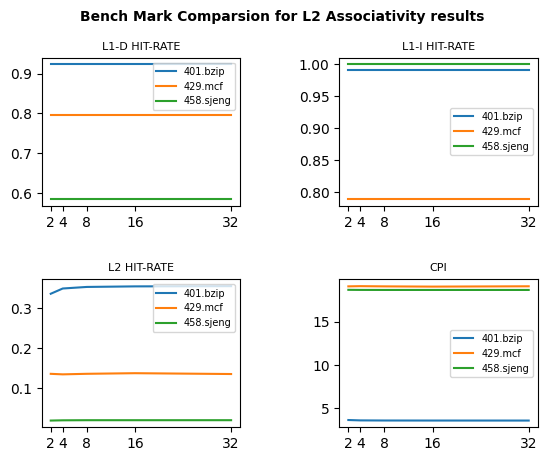

In [43]:
benchmarks = df['Test Bench Mark'].unique()
fig, axs = plt.subplots(2,2)
plt.subplots_adjust(wspace = 0.5,hspace=0.5)
for benchmark in benchmarks:
    data = res[res['Test Bench Mark'] == benchmark]
    k = 0
    for i in range(2):
        for j in range(2):
            axs[i,j].plot(data[test_param], data[ouputs[k]])
            axs[i,j].set_title(ouputs[k],fontsize=8)
            axs[i,j].set_xticks(data[test_param])
            axs[i,j].legend(benchmarks,fontsize='7')
            k += 1
title = 'Bench Mark Comparsion for {} results'.format(test_param)
fig.suptitle(title, fontsize=10, fontweight='bold')

# BLOCK SIZE

In [44]:
bench_mark = '401.bzip'
test_param ='BLOCK SIZE'
ouputs = ['L1-D HIT-RATE', 'L1-I HIT-RATE','L2 HIT-RATE','CPI']
cols = ['Test Bench Mark',test_param]
[cols.append(c) for c in ouputs]

res = df[(df['Test Bench Mark'] == bench_mark) & (df['Test Parameter'] == test_param)][cols]
res = res.reset_index(drop=True)
res

,Test Bench Mark,BLOCK SIZE,L1-D HIT-RATE,L1-I HIT-RATE,L2 HIT-RATE,CPI
0,401.bzip,32,0.939055,0.994882,0.335016,2.936596
1,401.bzip,64,0.727234,0.996895,0.727185,4.835013
2,401.bzip,128,0.696008,0.996998,0.672193,5.859129
3,401.bzip,256,0.728351,0.997997,0.767026,4.407183
4,401.bzip,512,0.629499,0.998012,0.653692,7.116593


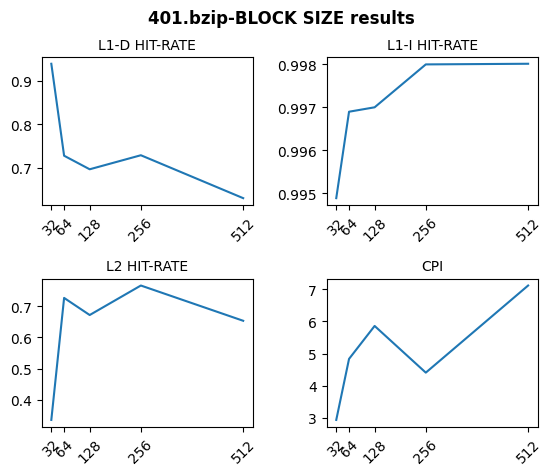

In [45]:
fig, axs = plt.subplots(2, 2)
plt.subplots_adjust(hspace = 0.3, wspace=0.35)
fig.subplots_adjust(hspace=0.5)

axs[0, 0].plot(res[test_param], res[ouputs[0]])
axs[0, 0].set_title(ouputs[0],fontsize=10)
axs[0, 0].set_xticks(res[test_param])
axs[0, 0].tick_params(axis='x', rotation=45)

axs[0, 1].plot(res[test_param], res[ouputs[1]])
axs[0, 1].set_title(ouputs[1],fontsize=10)
axs[0, 1].set_xticks(res[test_param])
axs[0, 1].tick_params(axis='x', rotation=45)

axs[1, 0].plot(res[test_param], res[ouputs[2]])
axs[1, 0].set_title(ouputs[2],fontsize=10)
axs[1, 0].set_xticks(res[test_param])
axs[1, 0].tick_params(axis='x', rotation=45)


axs[1, 1].plot(res[test_param], res[ouputs[3]])
axs[1, 1].set_title(ouputs[3],fontsize=10)
axs[1, 1].set_xticks(res[test_param])
axs[1, 1].tick_params(axis='x', rotation=45)

title = '{}-{} results'.format(bench_mark,test_param)
fig.suptitle(title, fontsize=12, fontweight='bold')
plt.show()

In [46]:
bench_mark = '429.mcf'
test_param ='BLOCK SIZE'
ouputs = ['L1-D HIT-RATE', 'L1-I HIT-RATE','L2 HIT-RATE','CPI']
cols = ['Test Bench Mark',test_param]
[cols.append(c) for c in ouputs]

res = df[(df['Test Bench Mark'] == bench_mark) & (df['Test Parameter'] == test_param)][cols]
res = res.reset_index(drop=True)
res

,Test Bench Mark,BLOCK SIZE,L1-D HIT-RATE,L1-I HIT-RATE,L2 HIT-RATE,CPI
0,429.mcf,32,0.817319,0.877652,0.180860,12.178820
1,429.mcf,64,0.811932,0.918875,0.224366,9.201452
2,429.mcf,128,0.783601,0.944083,0.263860,7.808054
3,429.mcf,256,0.744790,0.955089,0.274702,7.699568
4,429.mcf,512,0.965658,0.965516,0.219762,8.988029


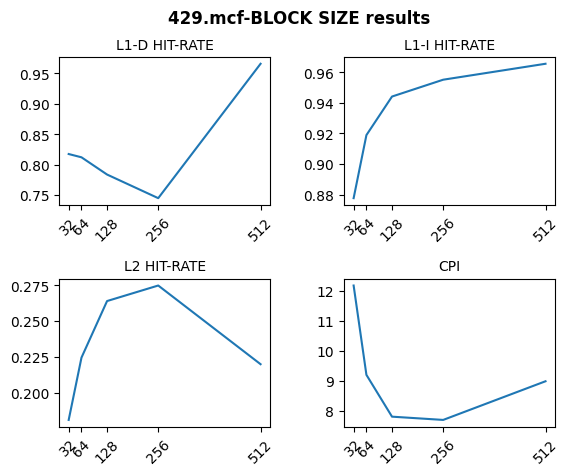

In [47]:
fig, axs = plt.subplots(2, 2)
plt.subplots_adjust(hspace = 0.3, wspace=0.35)
fig.subplots_adjust(hspace=0.5)

axs[0, 0].plot(res[test_param], res[ouputs[0]])
axs[0, 0].set_title(ouputs[0],fontsize=10)
axs[0, 0].set_xticks(res[test_param])
axs[0, 0].tick_params(axis='x', rotation=45)

axs[0, 1].plot(res[test_param], res[ouputs[1]])
axs[0, 1].set_title(ouputs[1],fontsize=10)
axs[0, 1].set_xticks(res[test_param])
axs[0, 1].tick_params(axis='x', rotation=45)

axs[1, 0].plot(res[test_param], res[ouputs[2]])
axs[1, 0].set_title(ouputs[2],fontsize=10)
axs[1, 0].set_xticks(res[test_param])
axs[1, 0].tick_params(axis='x', rotation=45)


axs[1, 1].plot(res[test_param], res[ouputs[3]])
axs[1, 1].set_title(ouputs[3],fontsize=10)
axs[1, 1].set_xticks(res[test_param])
axs[1, 1].tick_params(axis='x', rotation=45)

title = '{}-{} results'.format(bench_mark,test_param)
fig.suptitle(title, fontsize=12, fontweight='bold')
plt.show()

In [48]:
bench_mark = '458.sjeng'
test_param ='BLOCK SIZE'
ouputs = ['L1-D HIT-RATE', 'L1-I HIT-RATE','L2 HIT-RATE','CPI']
cols = ['Test Bench Mark',test_param]
[cols.append(c) for c in ouputs]

res = df[(df['Test Bench Mark'] == bench_mark) & (df['Test Parameter'] == test_param)][cols]
res = res.reset_index(drop=True)
res

,Test Bench Mark,BLOCK SIZE,L1-D HIT-RATE,L1-I HIT-RATE,L2 HIT-RATE,CPI
0,458.sjeng,32,0.781553,0.999930,0.028978,10.241443
1,458.sjeng,64,0.869264,0.999953,0.083196,6.256306
2,458.sjeng,128,0.902417,0.999965,0.151400,4.665294
3,458.sjeng,256,0.901067,0.999973,0.200930,4.525464
4,458.sjeng,512,0.877272,0.999974,0.211304,5.323540


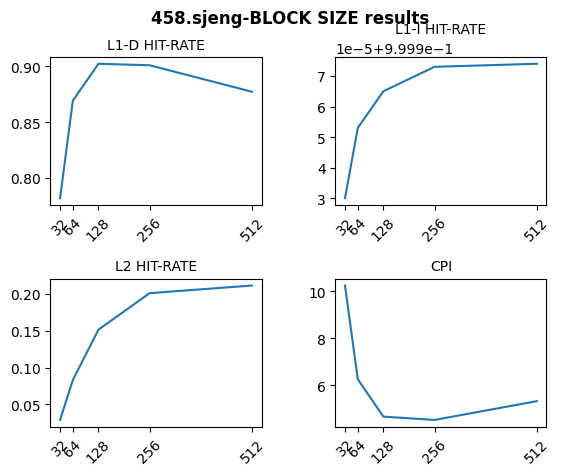

In [49]:
fig, axs = plt.subplots(2, 2)
plt.subplots_adjust(hspace = 0.3, wspace=0.35)
fig.subplots_adjust(hspace=0.5)

axs[0, 0].plot(res[test_param], res[ouputs[0]])
axs[0, 0].set_title(ouputs[0],fontsize=10)
axs[0, 0].set_xticks(res[test_param])
axs[0, 0].tick_params(axis='x', rotation=45)

axs[0, 1].plot(res[test_param], res[ouputs[1]])
axs[0, 1].set_title(ouputs[1],fontsize=10)
axs[0, 1].set_xticks(res[test_param])
axs[0, 1].tick_params(axis='x', rotation=45)

axs[1, 0].plot(res[test_param], res[ouputs[2]])
axs[1, 0].set_title(ouputs[2],fontsize=10)
axs[1, 0].set_xticks(res[test_param])
axs[1, 0].tick_params(axis='x', rotation=45)


axs[1, 1].plot(res[test_param], res[ouputs[3]])
axs[1, 1].set_title(ouputs[3],fontsize=10)
axs[1, 1].set_xticks(res[test_param])
axs[1, 1].tick_params(axis='x', rotation=45)

title = '{}-{} results'.format(bench_mark,test_param)
fig.suptitle(title, fontsize=12, fontweight='bold')
plt.show()

In [50]:
test_param ='BLOCK SIZE'
ouputs = ['L1-D HIT-RATE','L1-I HIT-RATE','L2 HIT-RATE','CPI']
cols = ['Test Bench Mark',test_param]
[cols.append(c) for c in ouputs]

res = df[(df['Test Parameter'] == test_param)][cols]
res = res.reset_index(drop=True)
res

,Test Bench Mark,BLOCK SIZE,L1-D HIT-RATE,L1-I HIT-RATE,L2 HIT-RATE,CPI
0,401.bzip,32,0.939055,0.994882,0.335016,2.936596
1,401.bzip,64,0.727234,0.996895,0.727185,4.835013
2,401.bzip,128,0.696008,0.996998,0.672193,5.859129
3,401.bzip,256,0.728351,0.997997,0.767026,4.407183
4,401.bzip,512,0.629499,0.998012,0.653692,7.116593
5,429.mcf,32,0.817319,0.877652,0.180860,12.178820
6,429.mcf,64,0.811932,0.918875,0.224366,9.201452
7,429.mcf,128,0.783601,0.944083,0.263860,7.808054
8,429.mcf,256,0.744790,0.955089,0.274702,7.699568
9,429.mcf,512,0.965658,0.965516,0.219762,8.988029


Text(0.5, 0.98, 'Bench Mark Comparsion for BLOCK SIZE results')

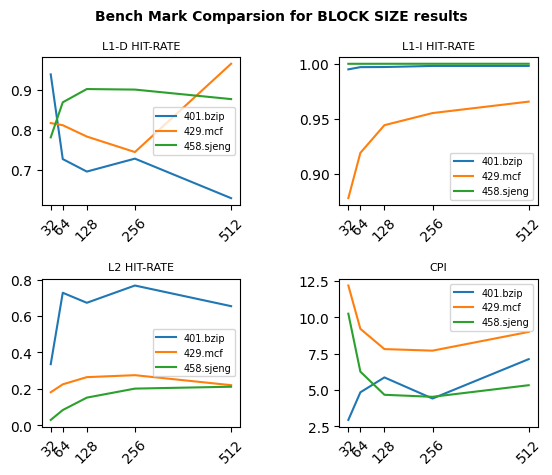

In [51]:
benchmarks = df['Test Bench Mark'].unique()
fig, axs = plt.subplots(2,2)
plt.subplots_adjust(wspace = 0.5,hspace=0.5)
for benchmark in benchmarks:
    data = res[res['Test Bench Mark'] == benchmark]
    k = 0
    for i in range(2):
        for j in range(2):
            axs[i,j].plot(data[test_param], data[ouputs[k]])
            axs[i,j].set_title(ouputs[k],fontsize=8)
            axs[i,j].set_xticks(data[test_param])
            axs[i,j].legend(benchmarks,fontsize='7')
            axs[i, j].tick_params(axis='x', rotation=45)
            k += 1
title = 'Bench Mark Comparsion for {} results'.format(test_param)
fig.suptitle(title, fontsize=10, fontweight='bold')